## Demo of _GPlite_  
### The Art of Gaussian Processes, Neurips 2021

In [3]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
from gp_lite import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# instatiate
gp = gp_lite()
gp.init_hypers()

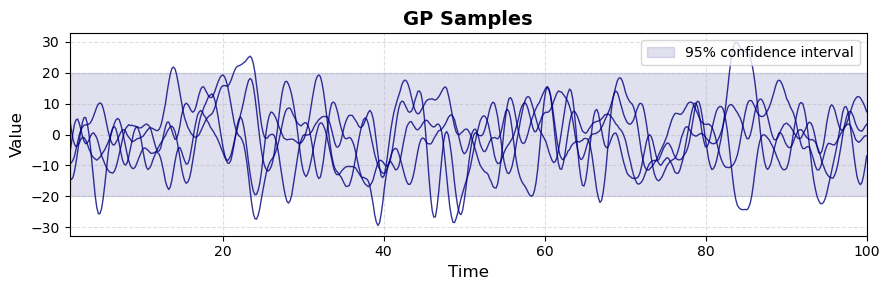

In [6]:
# sample from the prior
i=500
gp.compute_posterior(dimension=i)
gp.sample(how_many=4)
gp.plot_samples(plot_mean=False, save_path="img/gp_prior.pdf")

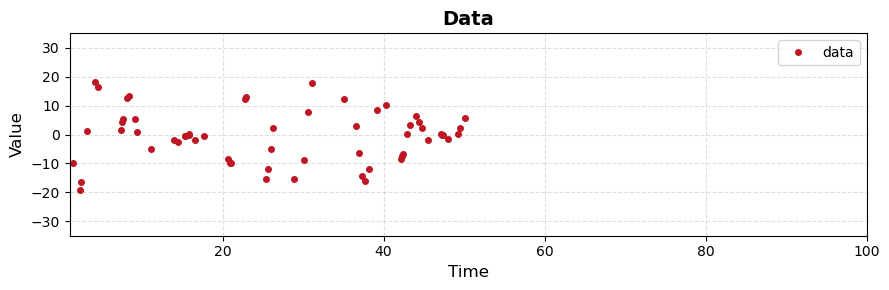

In [7]:
#produce data
N = 1000
x = 50*np.random.random(N) + 0.1*np.random.randn(N)
y = 20*np.cos(1.5*x)*np.cos(0.1*x) + 0.1*np.random.randn(N)

#subset
i = 60
x_sample = x[:i]
y_sample = y[:i]

#load and plot  data
gp.load(x_sample,y_sample)
gp.plot_data(v_axis_lims = 35, save_path="img/gp_samples.pdf")



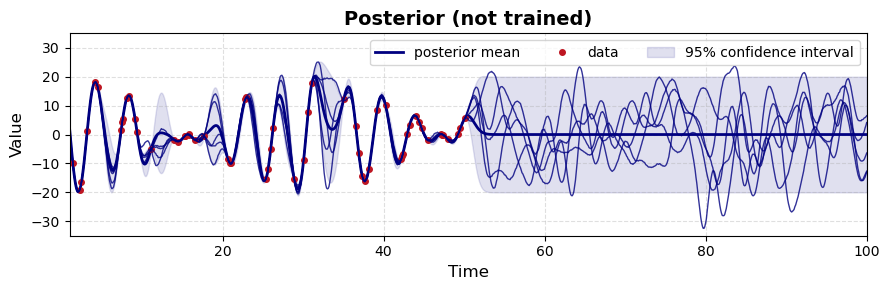

negative log-likelihood: 139.88341064230826


In [8]:
gp.compute_posterior(dimension=1000)
gp.plot_posterior(5,v_axis_lims = 35, title = 'Posterior (not trained)', save_path="img/gp_posterior_untrained.pdf")
print(f'negative log-likelihood: {gp.nll()}')

In [9]:
gp.train()

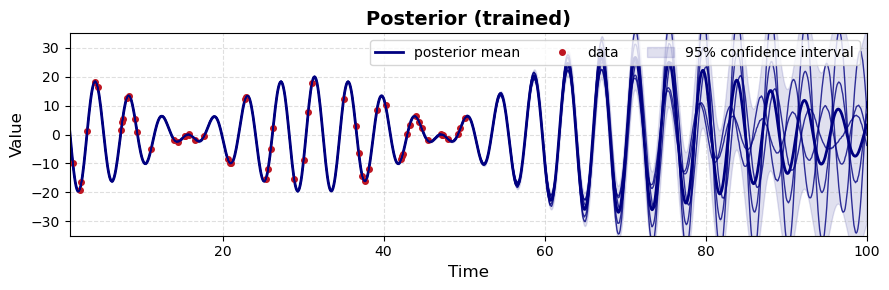

negative log-likelihood: 12.052461129207437


In [10]:
gp.compute_posterior(dimension=1000)
gp.plot_posterior(5,v_axis_lims = 35, title = 'Posterior (trained)', save_path="img/gp_posterior_trained.pdf")
print(f'negative log-likelihood: {gp.nll()}')

### What to do next?
- More kernels, multi-input
- Non-Gaussian likelihood
- Sparse approximations